# Modern problem solvers

In this lecture, we are going to look at the concept of a generic problem solver.  

We'll apply this concept to a variety of problems, such as  
- Breadth and Depth First Search.
- SAT Solvers.
- Reinforcement Learning. 
- Temporal Logic with TLA and Z3.
- Generic Monte Carlo Tree Searches with Convolutional Neural Networks and Machine Learning. 


## What to keep in mind.
- How little code is needed to express these ideas. 
- How the tooling is generic and pluggable so it can be applied to a broad class of problems. 
- While the examples are applied to trivial or toy problems, they can be scaled up to problems that involve many different variables.

## Breadth first and Depth first searches. 

The first class of problems that we will apply to are the tree searches.  Generally there are two methods for searching a tree, breadth first or depth first.  

<img src='graphics/tree.png'/>

Often times, finding the shortest path to a node in a tree uses breadth first search. However, Monte Carlo tree searches, such as those used by the AlphaGo program, use depth-first searches. 

### What is a Monte Carlo simulation?

How do casinos earn money? The trick is simple- The longer you play, the more likely it is that you will lose money to the casino.  Let us take a look at how this works with a simple Monte Carlo simulation.

Consider an imaginary game in which our player ‘Jack’, rolls an imaginary dice to get an outcome of 1 to 100. If Jack rolls anything from 1–51, the house wins, but if the number rolled is from 52–100, Jack wins. Simple enough?


Before simulating the outcomes, let’s calculate the house edge. The house edge displays the advantage the casino has in winning the bet. It’s the casino’s average profit from a player’s bet.

Let’s suppose Jack bets $1 on this game.<br>
Probability of Jack winning = 49/100<br>
Probability of the casino winning = 51/100<br>
Expected profit for the player= 1*(49/100) - 1*(51/100) = -0.02 = -2%<br>

Therefore, the house edge in our imaginary game is 2%. For comparison, the lowest house edge in European Roulette is 2.7%. In short, we have a better chance of winning in our imaginary game than in Roulette.

Now, let’s simulate different scenarios in Python to visualize the different outcomes if the player kept betting continuously.

In [22]:
# Import our required libraries. 
import random
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
''' We need a dice simulator which throws a value 
    from 1–100 with uniform probability distribution.
    Let’s create a function in Python which returns
    "True" if the player wins and "False" 
    if the Casino wins.
''' 
 
def rolldice():
    
    dice = random.randint(1,100)
    if dice <=51:
        return False
    elif dice >51 & dice <=100:
        return True

In [5]:
''' Create a function that simulates the bets. 
    We need to provide three arguments for the  
    function :
    1. Total funds : The money the player is
       starting with ($10,000)
    2. Wager Amount : The amount the player bets
       in each game ($100)
    3. Total plays : The number of times the
       player plays the game
       (This value is changed for creating 
        different scenarios)
'''

def play(total_funds, wager_amount, total_plays):
    
    #Create empty lists for :
    # 1.Play_number and 
    # 2.Funds available
    # 3.Final Fund
    Play_num = []
    Funds = []
    
# Start with play number 1
    play = 1
    
# If number of plays is less than the max number of plays
# we have set
    while play < total_plays:
        #If we win
        if rolldice():
            #Add the money to our funds
            total_funds = total_funds + wager_amount
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
            
         #If the house wins
        else:
            #subtract the wager from our funds
            total_funds = total_funds - wager_amount 
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
            
                
        #Increase the play number by 1
        play += 1
        
        #Line plot of funds over time
    plt.plot(Play_num,Funds)
    Final_funds.append(Funds[-1])
    return(Final_funds)
        

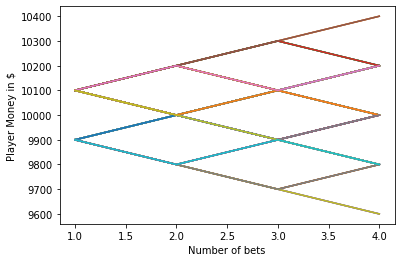

The player starts the game with $10,000 and ends with $10012.0


In [9]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,5)
    x+=1
    
    #Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()

#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))


In the previous code, we set the total number of simulations (plays) to 5.  Let's see what happens when we increase this to 10. 

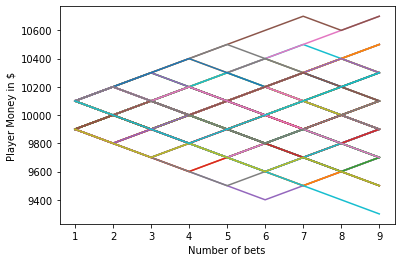

The player starts the game with $10,000 and ends with $9978.0


In [8]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,10)
    x+=1
    
    #Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()

#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

Now let's do 50 simulations. 

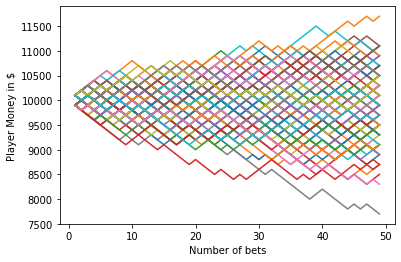

The player starts the game with $10,000 and ends with $9902.0


In [11]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,50)
    x+=1
    
    #Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()

#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

Let's run it again with 100 simulations. 

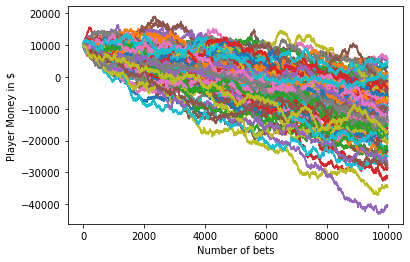

The player starts the game with $10,000 and ends with $-11168.0


In [19]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,10000)
    x+=1
    
    #Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()

#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

In [21]:
import constant

constant.PI = 3.14
constant.PI = 3.15

We can definitely see that the trend is downward. 
If we play long enough, we'll lose all of our money. 

## Another example of Monte Carlo simulation. 

Let's see how we can use the Monte Carlo simulation to model the movement of an equity and predict the price going forward. 



If we want to buy a particular stock, for example, we may like to try to look into the future and attempt to predict what kind of returns we can expect with what kind of probability, or we may be interested in investigating what potential extreme outcomes we may experience and how exposed we are to the risk of ruin or, on the flip side, superior returns.

To set up our simulation, we need to estimate the expected level of return mu($\mu$) and volatility (vol) of the stock in question. This data can be estimated from historic prices, with the simplest methods just assuming past mean return and volatility levels will continue into the future. One could also adjust historic data to account for investor views or market regime changes etc, however to keep things simple and concentrate on the code we will just set simple return and volatility levels based on past price data.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
from math import sqrt
quandl.ApiConfig.api_key = 'Uvc7KJzykfvBLjVkNDy2'
selected = ['AAPL']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['ticker','date', 'adj_close'] },
                        date = { 'gte': '2016-12-31', 'lte':'2017-12-31' }, paginate=True)

In [59]:
data

,ticker,date,adj_close
None,,,
0,AAPL,2018-03-27,168.340
1,AAPL,2018-03-26,172.770
2,AAPL,2018-03-23,164.940
3,AAPL,2018-03-22,168.845
4,AAPL,2018-03-21,171.270
5,AAPL,2018-03-20,175.240
6,AAPL,2018-03-19,175.300
7,AAPL,2018-03-16,178.020
8,AAPL,2018-03-15,178.650


In [63]:
days = (data.index[-1] - data.index[0])

In [76]:
days

248

In [65]:
data['adj_close'].iloc[-1]

114.71537780152

Here we will calculate the Compound Annual Growth Rate. 

Compound annual growth rate (CAGR) is the rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment’s lifespan.

In [66]:
cagr = ((((data['adj_close'].iloc[1]) / data['adj_close'].iloc[-1])) ** (365.0/days)) - 1

In [67]:
cagr

0.800806439343348

In [68]:
print ('CAGR =',str(round(cagr,4)*100)+"%")

CAGR = 80.08%


In [69]:
mu = cagr

In [70]:
data['Returns'] = data['adj_close'].pct_change()

In [71]:
data

,ticker,date,adj_close,Returns
None,,,,
0,AAPL,2017-12-29,169.230000,NaN
1,AAPL,2017-12-28,171.080000,0.010932
2,AAPL,2017-12-27,170.600000,-0.002806
3,AAPL,2017-12-26,170.570000,-0.000176
4,AAPL,2017-12-22,175.010000,0.026030
5,AAPL,2017-12-21,175.010000,0.000000
6,AAPL,2017-12-20,174.350000,-0.003771
7,AAPL,2017-12-19,174.540000,0.001090
8,AAPL,2017-12-18,176.420000,0.010771


In [72]:
vol = data['Returns'].std()*sqrt(252)

In [73]:
vol

0.17655605872673824

In [75]:
print ('mu =',str(round(cagr,4)*100)+"%")
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

mu = 80.08%
Annual Volatility = 17.66%


Now we know our mean return input (mu) is 80.08% and our volatility input (vol) is 17.66% – the code to actually run the Monte Carlo simulation is as follows:

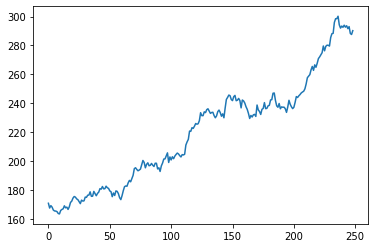

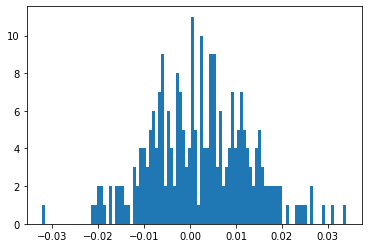

In [78]:
#Define Variables
S = data['adj_close'][1] #starting stock price (i.e. last available real stock price)
T = 248 #Number of trading days
mu = 0.8008 #Return
vol = 0.1766 #Volatility
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

The above code basically ran a single simulation of potential price series evolution over a trading year (248 days), based upon a draw of random daily returns that follow a normal distribution. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period.

We have managed to successfully simulate a year’s worth of future daily price data, however this really doesn’t afford us much insight into risk and return characteristics of the stock as we only have one randomly generated path. The likelihood of the actual price evolving exactly as described in the above charts is nearly zero.

The real insight of a Monte Carlo simulation is gained from running thousands, tens of thousands or even hundreds of thousands of simulations, with each run producing a different series of potential price evolution based upon the same stock characteristics (mu and vol).

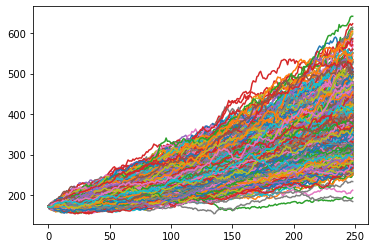

In [80]:
#Define Variables
S = data['adj_close'][1] #starting stock price (i.e. last available real stock price)
T = 248 #Number of trading days
mu = 0.8008 #Return
vol = 0.1766 #Volatility
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
#create list of daily returns using random normal distribution
    daily_returns=np.random.normal((mu/T),vol/sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
    plt.plot(price_list)
plt.show()
#plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
#plt.show()

This give us the following plot of the 1000 different simulated price series

Now we can see the potential outcomes generated from 1000 different simulations, all based on the same basic inputs, allowing for the randomness of the daily return series.

Note that the spread of final prices is quite large, ranging from around \\$45 to $500 USD. 